### **In this code, I'm employing the concept of steganography, which involves concealing data within an image. The input string is converted into an ASCII representation, serving as the secret key. The image is then processed by extracting its RGB channels. Utilizing the least significant bit (LSB) method, I execute an XOR operation to embed the data within the image. The resulting output is a modified version of the image. To quantify the disparity between the original and modified images, I compute the mean square error (MSE) and the peak signal-to-noise ratio (PSNR). This encapsulates the process and methodologies employed within the code.**

### **This code snippet is importing several Python libraries for data visualization, numerical computing, mathematical operations, and computer vision tasks.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import log10, sqrt
import cv2

### **This part of the code takes an image as input, fetches the RGB values of each pixel, and creates an array containing the collection of all the pixels.**

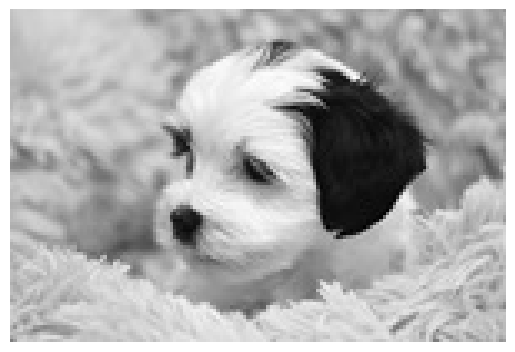

In [2]:
image_path = '/content/dog-7206321_640.jpg'
img = cv2.imread(image_path)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap='gray')
plt.axis('off')
height, width, channels = image.shape

### **This part of the code contains the essential function for manipulating the data.**

In [3]:
def int_to_bin(n):
  bin_val = []
  for i in n:
    a = (bin(int(i)))[2:]
    bin_val.append(a)
  return [bin_val][0]
def display_image_from_colors(color_array, c_map = 'gray'):
    np_array = np.array(color_array, dtype=np.uint8)
    plt.imshow(np_array, cmap = c_map)
    plt.axis('off')
    plt.show()
def adding_values(adding_list, main_image_list):
    final_list_of_binary_value_to_impliment = []
    for i in range(0, len(main_image_list)):
      if i < len(adding_list):
          final_list_of_binary_value_to_impliment.append(int(adding_list[i]) ^ int(main_image_list[i]))
      else:
          final_list_of_binary_value_to_impliment.append(int(main_image_list[i]))
    return final_list_of_binary_value_to_impliment
from math import log10, sqrt
def PSNR(original, compressed):
    mse = MSE(original, compressed)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
def MSE(original, compressed):
  mse = ((sum([((original[i]) - compressed[i])**2 for i in range(len(original))]))/len(original))
  return (mse)

### **We will create two different branches of a single image: a normal image and an encrypted image. The values of the encrypted image will be significantly altered, and then we will compare it to the normal image.**

In [4]:
normal_image = image.reshape(height * width * channels)
increpted_image = image.reshape(height * width * channels)

### **Create a dictionary named alpha_dict that contains the alphabet and their ASCII key values ranging from 32 to 127.**

In [5]:
alpha_dict = {chr(i): i for i in range(32, 127)}

### **Create a variable named 'string_to_incrept' to increment, which contains the data that we want to encrypt.**

In [6]:
string_to_Encrypt = 'hii, my name is kanishk kumar singh, how are you'

### **This part of the code increments the strength by processing each character one at a time, converting it to its ASCII value. It then uses a loop to check the length of the binary representation of the ASCII value. If the length is 7, a zero is added at the beginning; if the length is 6, two zeros are added at the beginning.the binary value is appended to the final list for further processing.**

In [7]:
int_string_to_incrept = [(alpha_dict.get(i)) for i in (string_to_Encrypt)]
binary_value_to_impliment = (int_to_bin(int_string_to_incrept))
final_list_of_binary_value_to_impliment = []
for i in binary_value_to_impliment:
  if len(i) == 7:
    i = ("0"+str(i))
  elif len(i) == 6:
    i = ("00"+str(i))
  for j in i:
    final_list_of_binary_value_to_impliment.append(j)


### **In this code, a variable named final_image is used with a function called adding_values. This function takes two arguments: the first is a collection of all the binary numbers, and the second is the image to which we want to append the values.**

In [8]:
final_image = adding_values(final_list_of_binary_value_to_impliment, increpted_image)

### **Inthis code, we calculate the Peak Signal-to-Noise Ratio (PSNR) and the Mean Square Error (MSE). Both metrics take two arguments: the first is the original (normal) image, and the second is the modified (final) image. The output provides a measure of the difference between the two images.**

In [9]:
print(f"PSNR value is ({PSNR(np.array(normal_image, dtype=np.float64), np.array(final_image, dtype=np.float64))})")
print(f"MSE value is ({MSE(np.array(normal_image, dtype=np.float64), np.array(final_image, dtype=np.float64))})")

PSNR value is (72.12967881690953)
MSE value is (0.003982102908277405)


### **The final output of two images**

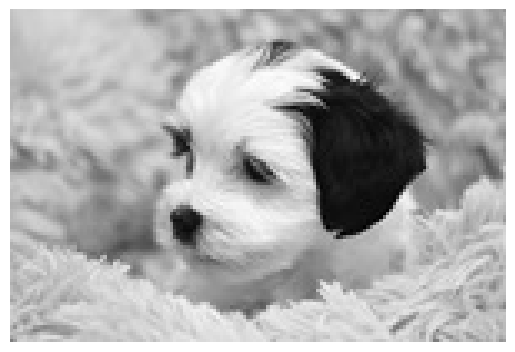

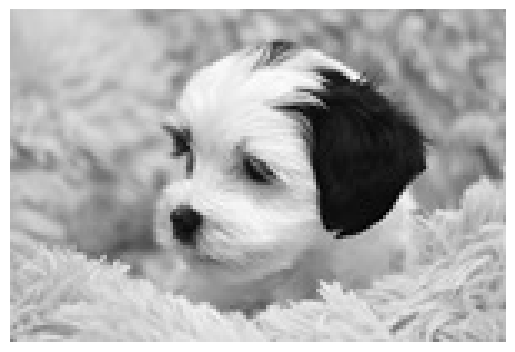

In [10]:
display_image_from_colors((np.array(normal_image)).reshape(height, width, channels))
display_image_from_colors((np.array(final_image)).reshape(height, width, channels))

### **Visualizing the difference between the normal and final image is soon bir graph**

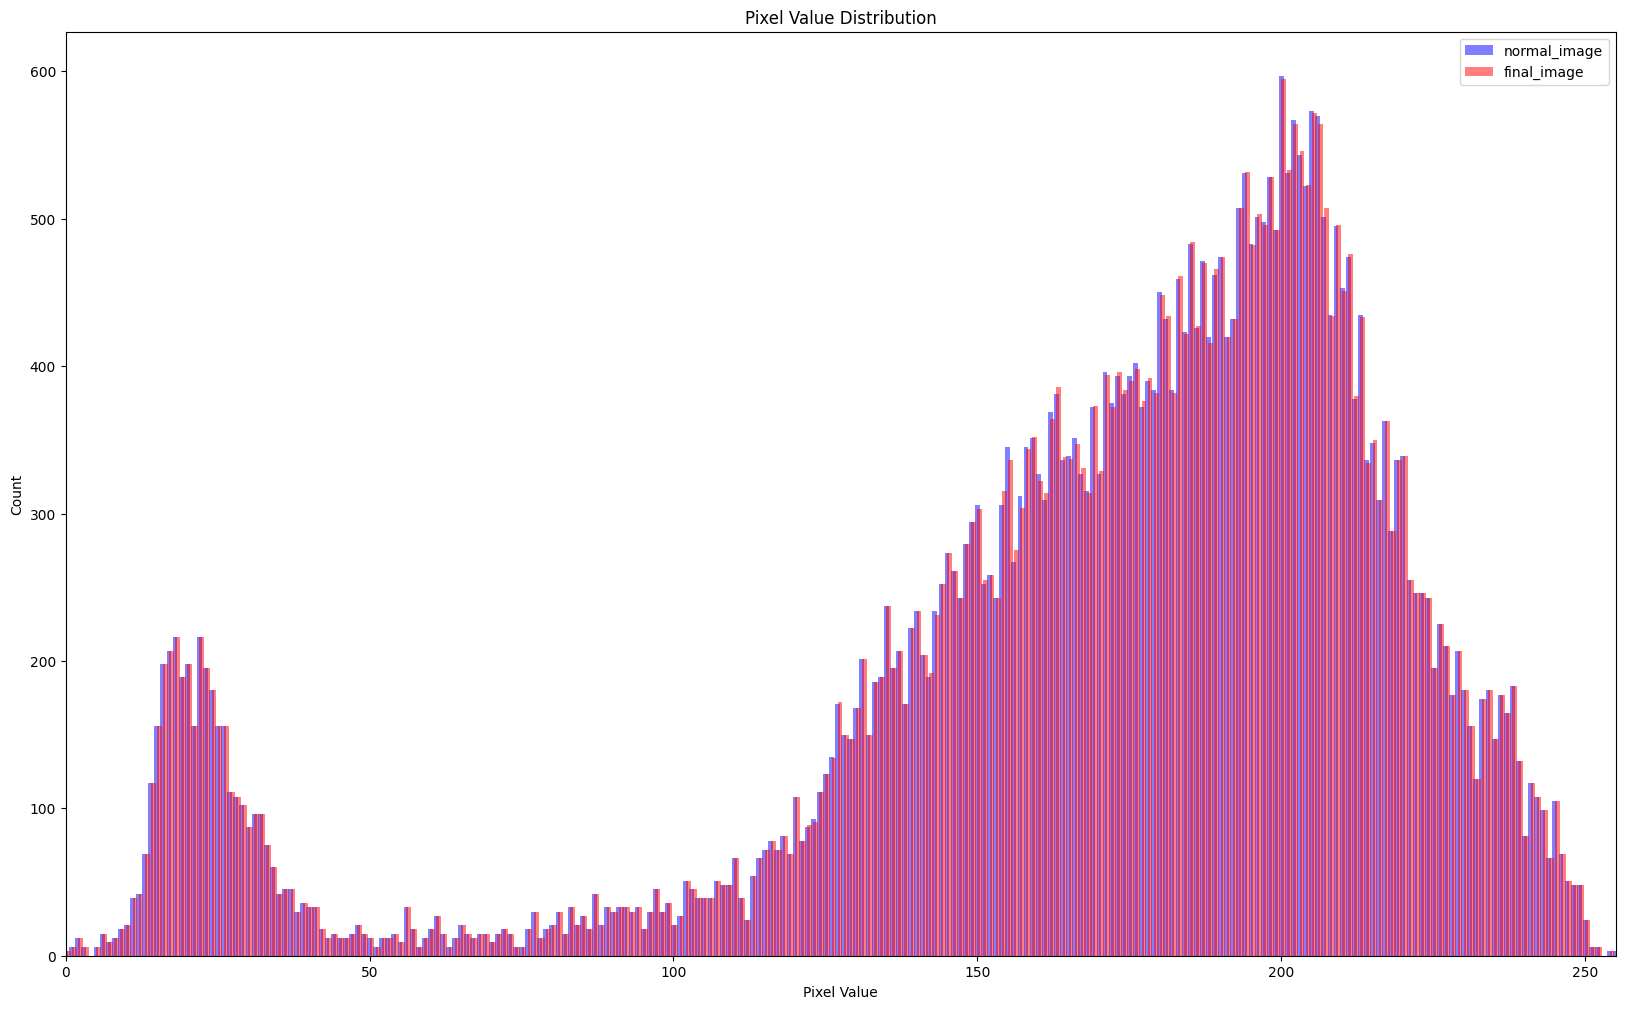

In [11]:
# Generate random pixel values for two datasets (example)
pixel_values_1 = normal_image
pixel_values_2 = final_image

# Count occurrences of each pixel value for both datasets
pixel_counts_1 = np.bincount(pixel_values_1, minlength=256)
pixel_counts_2 = np.bincount(pixel_values_2, minlength=256)
plt.figure(figsize=(20,12))

# Plot the first bar graph
plt.bar(range(256), pixel_counts_1, color='b', alpha=0.5, label='normal_image')
# Plot the second bar graph, offsetting slightly for better visualization
plt.bar(np.arange(256) + 0.4, pixel_counts_2, color='r', alpha=0.5, label='final_image')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.xlim(0, 255)  # Set x-axis limit to match the pixel value range
plt.legend()
plt.show()
